In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Getting data from Github repository

In [ ]:
# Getting data from git repository
# will create folder named dog-cat-full-dataset
# Inside content folder
# And is temporary
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

fatal: destination path 'dog-cat-full-dataset' already exists and is not an empty directory.


In [ ]:
# To access train and test images
train_image_dir = '/content/dog-cat-full-dataset/data/train'
test_image_dir ='/content/dog-cat-full-dataset/data/test'

In [ ]:
# Resizing image because we have large image but have limited training resource
# setting parameters
image_height =32
image_width = 32
batch_size = 20

In [ ]:
datagen = ImageDataGenerator(rescale =1./255)

In [ ]:
train_generator = datagen.flow_from_directory(directory=train_image_dir,target_size=(image_width,image_height),classes=['dogs','cats'],class_mode='binary',batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
validation_generator = datagen.flow_from_directory(directory=test_image_dir,target_size=(image_width,image_height),classes=['dogs','cats'],class_mode='binary',batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [ ]:
# Total number of training image = len(train_generator) * batch_size
# total number of training image = 1000 * 20
len(train_generator)

1000

In [ ]:
# 250 * 20
len(validation_generator)

250

### Building CNN Base Model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape = (image_width,image_height,3)))
model.add(MaxPool2D(2,2))

# Convert multidimensional data to vectors
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt = SGD(learning_rate=0.01,momentum=0.9)

In [ ]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics =['accuracy'])

In [ ]:
# To record history of training
history = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1000/1000 [==============================] - 97s 97ms/step - loss: 0.6965 - accuracy: 0.4987 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 96s 96ms/step - loss: 0.6936 - accuracy: 0.5063 - val_loss: 0.6937 - val_accuracy: 0.5002
Epoch 3/5
1000/1000 [==============================] - 96s 96ms/step - loss: 0.6911 - accuracy: 0.5118 - val_loss: 0.6928 - val_accuracy: 0.5080
Epoch 4/5
1000/1000 [==============================] - 98s 98ms/step - loss: 0.6587 - accuracy: 0.6073 - val_loss: 0.6106 - val_accuracy: 0.6776
Epoch 5/5
1000/1000 [==============================] - 94s 94ms/step - loss: 0.5885 - accuracy: 0.6956 - val_loss: 0.5503 - val_accuracy: 0.7174


In [ ]:
history.history

{'accuracy': [0.49869999289512634,
  0.5062999725341797,
  0.5117999911308289,
  0.6073499917984009,
  0.6955999732017517],
 'loss': [0.6965196132659912,
  0.6935585141181946,
  0.6911495327949524,
  0.6587076187133789,
  0.5884597897529602],
 'val_accuracy': [0.5,
  0.5001999735832214,
  0.5080000162124634,
  0.6776000261306763,
  0.7174000144004822],
 'val_loss': [0.6934221386909485,
  0.6937469840049744,
  0.6927767395973206,
  0.6106045246124268,
  0.5502942800521851]}

In [ ]:
def plot_learning_curve(history):

  # plotting training and validation accuracy values
  epoch_range = range(1,6)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  # plotting training and validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()

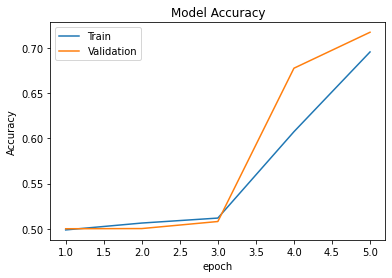

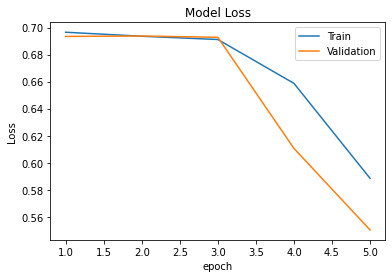

In [ ]:
# Plotting learning curve
# It seems that model is underfitted
plot_learning_curve(history)

### Implement First 3 Blocks of **VGG16** Model

In [ ]:
model = Sequential()
# First layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape = (image_width,image_height,3)))
model.add(MaxPool2D(2,2))

# Second layer
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

# Third layer
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))


# Convert multidimensional data to vectors
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))

# Output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt = SGD(learning_rate=0.01,momentum=0.9)

In [ ]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics =['accuracy'])

In [ ]:
# To record history of training
history = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Epoch 1/5
1000/1000 [==============================] - 172s 172ms/step - loss: 0.6291 - accuracy: 0.6354 - val_loss: 0.5709 - val_accuracy: 0.7078
Epoch 2/5
1000/1000 [==============================] - 174s 174ms/step - loss: 0.5280 - accuracy: 0.7340 - val_loss: 0.4910 - val_accuracy: 0.7610
Epoch 3/5
1000/1000 [==============================] - 171s 171ms/step - loss: 0.4711 - accuracy: 0.7745 - val_loss: 0.4709 - val_accuracy: 0.7720
Epoch 4/5
1000/1000 [==============================] - 170s 170ms/step - loss: 0.4333 - accuracy: 0.7986 - val_loss: 0.4471 - val_accuracy: 0.7894
Epoch 5/5
1000/1000 [==============================] - 170s 170ms/step - loss: 0.3906 - accuracy: 0.8214 - val_loss: 0.4516 - val_accuracy: 0.7892


In [ ]:
def plot_learning_curve_(history):

  # plotting training and validation accuracy values
  epoch_range = range(1,6)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  # plotting training and validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()

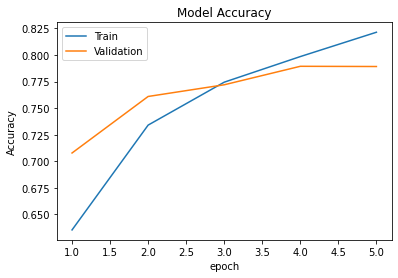

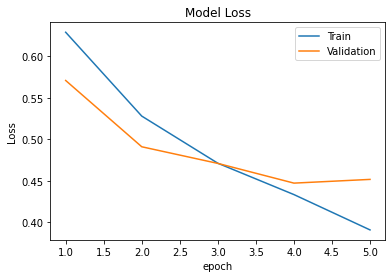

In [ ]:
plot_learning_curve_(history)
# Model is overfitted from third epochs

### Batch Normalization and Dropout

In [ ]:
model = Sequential()
# First layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape = (image_width,image_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))

# Second layer
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


# Third layer
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))



# Convert multidimensional data to vectors
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


# Output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt = SGD(learning_rate=0.01,momentum=0.9)

In [ ]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics =['accuracy'])

In [ ]:
# To record history of training
history = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Epoch 1/5
1000/1000 [==============================] - 196s 196ms/step - loss: 0.6471 - accuracy: 0.6475 - val_loss: 0.5837 - val_accuracy: 0.6964
Epoch 2/5
1000/1000 [==============================] - 193s 193ms/step - loss: 0.5571 - accuracy: 0.7188 - val_loss: 0.5327 - val_accuracy: 0.7220
Epoch 3/5
1000/1000 [==============================] - 195s 195ms/step - loss: 0.5120 - accuracy: 0.7521 - val_loss: 0.6983 - val_accuracy: 0.6506
Epoch 4/5
1000/1000 [==============================] - 192s 192ms/step - loss: 0.4802 - accuracy: 0.7703 - val_loss: 0.6047 - val_accuracy: 0.6988
Epoch 5/5
1000/1000 [==============================] - 192s 192ms/step - loss: 0.4572 - accuracy: 0.7840 - val_loss: 0.5396 - val_accuracy: 0.7286


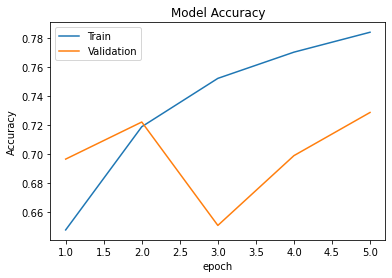

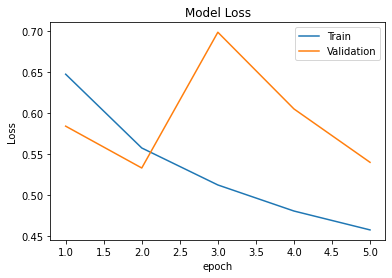

In [ ]:
plot_learning_curve_(history)